Note: Data in both VehicleRegistrationData.csv and electric_bov.csv is taken from https://vahan.parivahan.gov.in/vahan4dashboard/vahan/vahan/view/reportview.xhtml

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
df = pd.read_csv("VehicleRegistrationData.csv")
df.head(10)

,Year,State,Broad_category,Fuel_category,Registered_vehicle
0,2013,Karnataka,2 Wheeler,CNG,0
1,2013,Karnataka,2 Wheeler,Diesel & Others,505
2,2013,Karnataka,2 Wheeler,Electric Vehicle,222
3,2013,Karnataka,2 Wheeler,Others,74
4,2013,Karnataka,2 Wheeler,Petrol & Others,1077166
5,2014,Karnataka,2 Wheeler,CNG,0
6,2014,Karnataka,2 Wheeler,Diesel & Others,387
7,2014,Karnataka,2 Wheeler,Electric Vehicle,194
8,2014,Karnataka,2 Wheeler,Others,120
9,2014,Karnataka,2 Wheeler,Petrol & Others,1195476


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                660 non-null    int64 
 1   State               660 non-null    object
 2   Broad_category      660 non-null    object
 3   Fuel_category       660 non-null    object
 4   Registered_vehicle  660 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 25.9+ KB


- Year: last 11 years
- State: Karnataka
- Broad_category: Different type of vehicles
- Fuel_category: Different type of fuels
- Registered_vehicle: #vehicles registered in that year, broad_cat and fuel_cat.

In [4]:
print(df.Year.unique())
print(df.State.unique())
print(df.Broad_category.unique())
print(df.Fuel_category.unique())

[2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
['Karnataka']
['2 Wheeler' '3 Wheeler' 'HGV' 'HMV' 'HPV' 'LGV' 'LMV' 'LPV' 'MGV' 'MMV'
 'MPV' 'Others']
['CNG' 'Diesel & Others' 'Electric Vehicle' 'Others' 'Petrol & Others']


# Data Cleaning
Removing state column as it does not help with analysis.

In [5]:
df = df.drop(['State'], axis=1)
df.shape

(660, 4)

Making common categories:

 - HV for HGV, HMV, and HPV
 - MV for MGV, MMV, and MPV
 - LV for LGV, LMV, and LPV

In [6]:
years = [2013, 2014, 2015, 2016, 2017 ,2018, 2019, 2020, 2021, 2022 ,2023]
broadCat = ['HGV', 'HMV', 'HPV', 'LGV', 'LMV', 'LPV', 'MGV', 'MMV', 'MPV']
broadCat1 = ['HGV', 'HMV', 'HPV']
broadCat2 = ['LGV', 'LMV', 'LPV']
broadCat3 = ['MGV', 'MMV', 'MPV']
fuelCat = ['CNG', 'Diesel & Others', 'Electric Vehicle', 'Others', 'Petrol & Others']
def insertrows(df,broadCat, str):
    for i in years:
        for j in fuelCat:
            registered=0
            for k in broadCat:
                register = df[(df.Year==i) & (df.Fuel_category==j) & (df.Broad_category== k)].Registered_vehicle
                number = register.sum()
                registered += number
            new_row = {'Year': i, 'Broad_category': str, 'Fuel_category': j, 'Registered_vehicle': registered}
            df.loc[len(df)] = new_row
    return df


In [7]:
df = insertrows(df, broadCat1, 'HV')
df = insertrows(df, broadCat2, 'LV')
df = insertrows(df, broadCat3, 'MV')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 0 to 824
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                825 non-null    int64 
 1   Broad_category      825 non-null    object
 2   Fuel_category       825 non-null    object
 3   Registered_vehicle  825 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 32.2+ KB


In [9]:
df = df[~df['Broad_category'].isin(broadCat)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 0 to 824
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                330 non-null    int64 
 1   Broad_category      330 non-null    object
 2   Fuel_category       330 non-null    object
 3   Registered_vehicle  330 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 12.9+ KB


In [10]:
df = df.reset_index(drop=True)


In [11]:
print(df)
print(df.Broad_category.unique())

     Year Broad_category     Fuel_category  Registered_vehicle
0    2013      2 Wheeler               CNG                   0
1    2013      2 Wheeler   Diesel & Others                 505
2    2013      2 Wheeler  Electric Vehicle                 222
3    2013      2 Wheeler            Others                  74
4    2013      2 Wheeler   Petrol & Others             1077166
..    ...            ...               ...                 ...
325  2023             MV               CNG                 103
326  2023             MV   Diesel & Others                6439
327  2023             MV  Electric Vehicle                   0
328  2023             MV            Others                  39
329  2023             MV   Petrol & Others                   0

[330 rows x 4 columns]
['2 Wheeler' '3 Wheeler' 'Others' 'HV' 'LV' 'MV']


Making separate dataframes for each broad category and fuel category to analyse each category.

In [12]:
broadCat = ['2 Wheeler', '3 Wheeler', 'HV', 'LV', 'MV', 'Others']
df_ = np.empty(len(broadCat), dtype=object)
for i in range(len(broadCat)):
    df_[i]=df[df['Broad_category']==broadCat[i]]
df_.shape


(6,)

In [13]:
fuelCat = ['CNG', 'Diesel & Others', 'Electric Vehicle', 'Others', 'Petrol & Others']
df_f = np.empty((len(broadCat),len(fuelCat)), dtype=object)
for i in range(len(df_)):
    for j, fueltype in enumerate(fuelCat):
        df_f[i][j] = df_[i][df_[i]['Fuel_category']==fueltype]


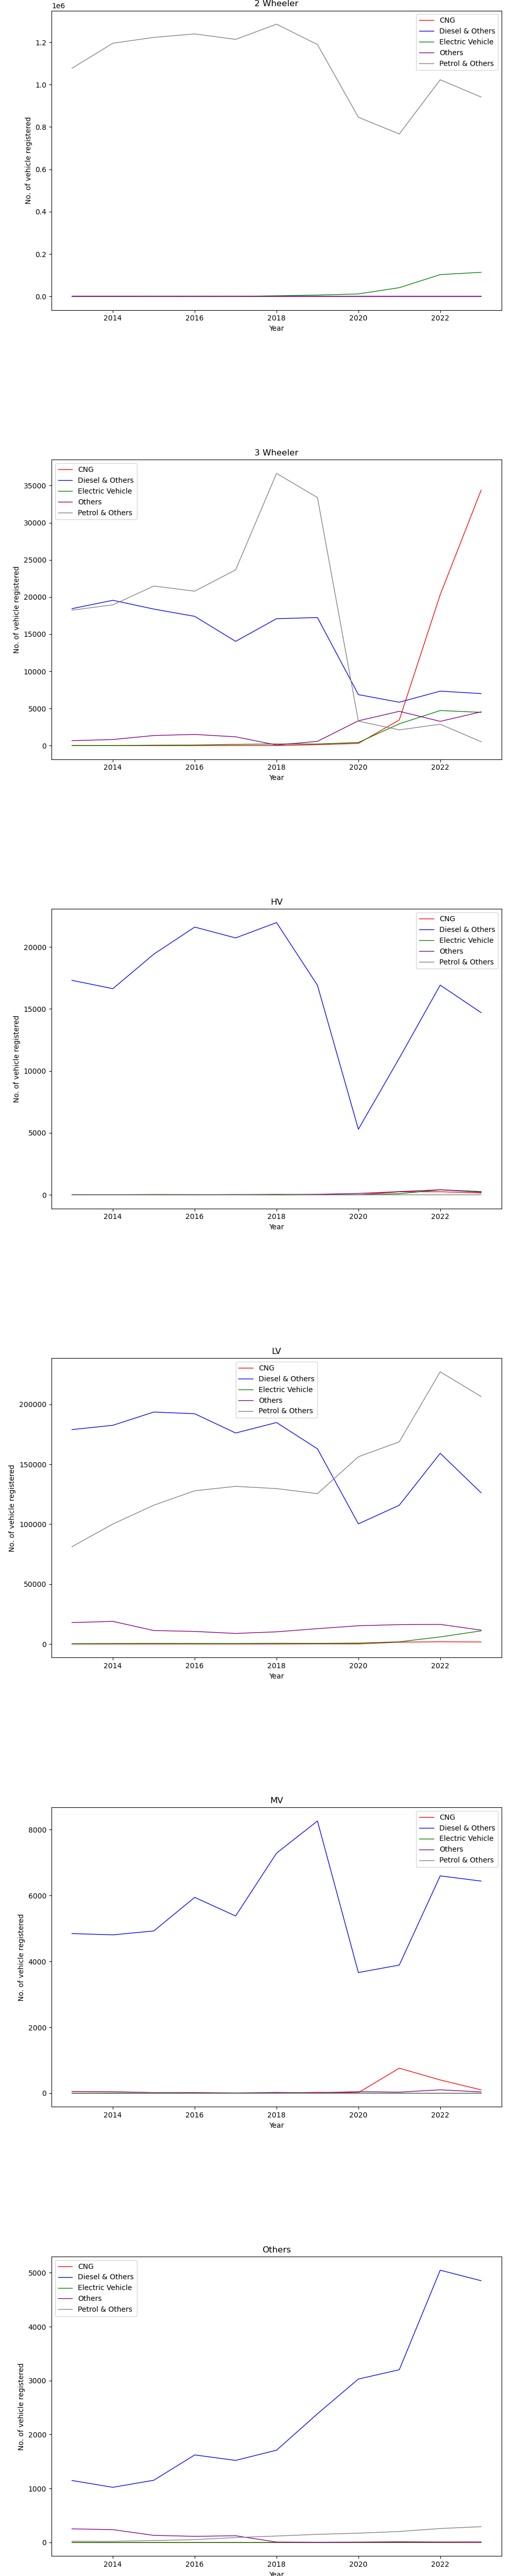

In [14]:
color = ['red','blue','green','purple','grey']
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig, axes = plt.subplots(6, 1, figsize=(10, 50))
plt.tight_layout()
plt.subplots_adjust(left =0.1,hspace=0.5)
for i in range(6):
    ax = axes[i]
    for j in range(len(fuelCat)):
        ax.plot(years,df_[i][df_[i].Fuel_category==fuelCat[j]].Registered_vehicle, linewidth=1,color=color[j],label=fuelCat[j])
    ax.set_xlabel('Year')
    ax.set_ylabel('No. of vehicle registered')
    ax.set_title(f"{broadCat[i]}")
    ax.legend()
plt.show()

One common trend which can be seen in all graphs is the decline in #registrations in 2020-21, that is particularly due to __COVID__. Also EVs started to emerge in 2020 itself, which can be credited to technological breakthrough at that time in India.

Separate trend analysis is done below:

- __2 Wheeler__: EV have started emerging as a new and eco-friendly options. Though Petrol related fuels reigns in 2 Wheeler, we can see decline in petrol registered 2 wheelers.
- __3 Wheeler__: #registered vehicles in CNG and EVs have increased significantly, along with decrease in petrol and diesel related fuels.
- __HV__: There isn't much change in preference of fuel type in this category. But considering only diesel fuel we can say that these vehicles are run on regular basis.
- __LV__: Even though registered EVs are very low but we can clearly see that with development in technology EVs will grow further. Also, in every other fuel type there is a decreaseing trend.
- __MV__: There isn't much change in preference of fuel type in this category. But considering only diesel fuel we can say that these vehicles are run on regular basis.

# Feature Engineering
Performing feature engineering to focus on two major areas.

- What is the cummulative trend of each Broad_category? 
- Growth of EVs.

1. Let's understand trend of each Broad Category first and draw some meaningful insights.


In [15]:
df_grouped = df.groupby(['Year', 'Broad_category'], as_index=False)['Registered_vehicle'].sum()

print(df_grouped)

    Year Broad_category  Registered_vehicle
0   2013      2 Wheeler             1077967
1   2013      3 Wheeler               37359
2   2013             HV               17352
3   2013             LV              278413
4   2013             MV                4907
..   ...            ...                 ...
61  2023      3 Wheeler               50939
62  2023             HV               15335
63  2023             LV              357152
64  2023             MV                6581
65  2023         Others                5157

[66 rows x 3 columns]


In [16]:
_df = np.empty(len(broadCat), dtype=object)
for i in range(len(broadCat)):
    _df[i]= df_grouped[df_grouped.Broad_category == broadCat[i]]
    _df[i] = _df[i].drop(['Broad_category'], axis=1)
    _df[i] = _df[i].reset_index(drop=True)
    print(f"{broadCat[i]}\n",_df[i])

2 Wheeler
     Year  Registered_vehicle
0   2013             1077967
1   2014             1196177
2   2015             1223533
3   2016             1239856
4   2017             1214133
5   2018             1288606
6   2019             1195687
7   2020              857940
8   2021              808153
9   2022             1125867
10  2023             1055212
3 Wheeler
     Year  Registered_vehicle
0   2013               37359
1   2014               39342
2   2015               41289
3   2016               39786
4   2017               39064
5   2018               54040
6   2019               51551
7   2020               14242
8   2021               18983
9   2022               38524
10  2023               50939
HV
     Year  Registered_vehicle
0   2013               17352
1   2014               16667
2   2015               19474
3   2016               21654
4   2017               20773
5   2018               22046
6   2019               16956
7   2020                5416
8   2021         

In [17]:
_df[0]

,Year,Registered_vehicle
0,2013,1077967
1,2014,1196177
2,2015,1223533
3,2016,1239856
4,2017,1214133
5,2018,1288606
6,2019,1195687
7,2020,857940
8,2021,808153
9,2022,1125867


In [18]:
def plot_ts(dframe, category):
    fig, axes = plt.subplots(len(dframe), 1, figsize = (10,25))
    plt.tight_layout(h_pad=10)
    plt.subplots_adjust(left = 0.1,hspace=0.5)
    for i in range(len(dframe)):
        ax = axes[i]
        ax.plot(dframe[i].Year, dframe[i].Registered_vehicle, color = 'blue', linewidth = 1)
        mean_value = np.mean(dframe[i].Registered_vehicle)
        ax.axhline(y=mean_value, color='r', linestyle='--', label='Mean', alpha =0.2)
        for year in years:
            ax.axvline(x=year, color='gray', linestyle='--', linewidth=1, alpha = 0.2)
        ax.set_xlabel('Year')
        ax.set_ylabel('Total no. of vehicle registered')
        ax.set_title(f"{category[i]}")
        ax.legend()
    plt.show()

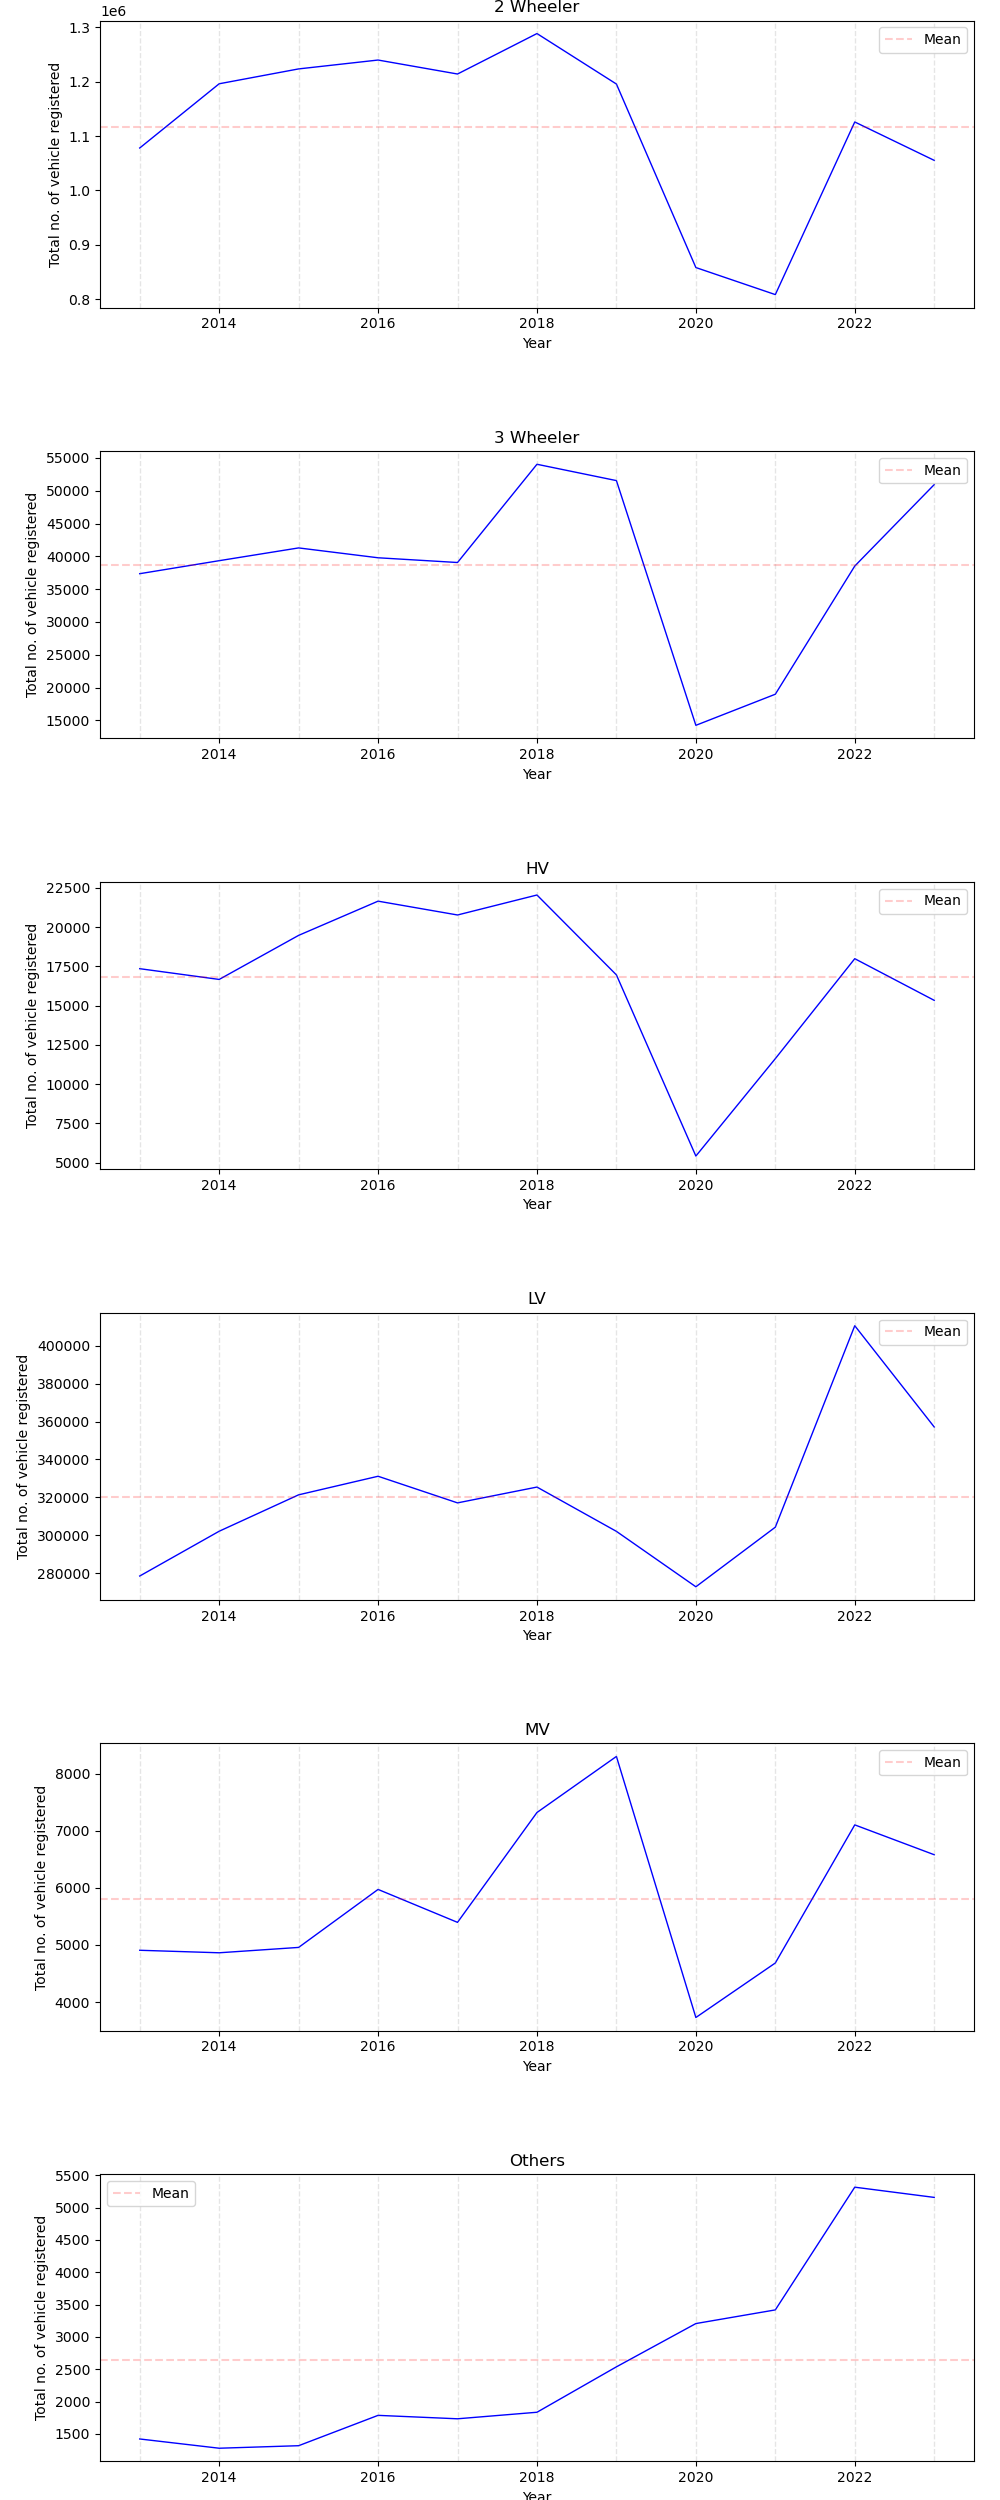

In [19]:
plot_ts(_df,broadCat)

The sudden drop in total no. of registered vehicles happen in 2020, the same year when COVID started and continued till 2021. We can observe this information from the graphs also.

Using these we can train a model and predict the number of registrations in the year 2024 and compare it with the actual data of 2024.

2. We will now see the trend on the basis of fuel type.
Majorly we will be directing our analysis on the growth of EVs.

In [20]:
df_grouped_f = df.groupby(['Year', 'Fuel_category'], as_index=False)['Registered_vehicle'].sum()

print(df_grouped_f)

    Year     Fuel_category  Registered_vehicle
0   2013               CNG                  13
1   2013   Diesel & Others              221213
2   2013  Electric Vehicle                 518
3   2013            Others               18983
4   2013   Petrol & Others             1176694
5   2014               CNG                  14
6   2014   Diesel & Others              224982
7   2014  Electric Vehicle                 641
8   2014            Others               20141
9   2014   Petrol & Others             1314621
10  2015               CNG                  13
11  2015   Diesel & Others              237787
12  2015  Electric Vehicle                 695
13  2015            Others               12992
14  2015   Petrol & Others             1360391
15  2016               CNG                   9
16  2016   Diesel & Others              239053
17  2016  Electric Vehicle                 626
18  2016            Others               12323
19  2016   Petrol & Others             1388163
20  2017     

In [21]:
_df_f = np.empty(len(fuelCat), dtype=object)
for i in range(len(fuelCat)):
    _df_f[i]= df_grouped_f[df_grouped_f.Fuel_category == fuelCat[i]]
    _df_f[i] = _df_f[i].drop(['Fuel_category'], axis=1)
    _df_f[i] = _df_f[i].reset_index(drop=True)
    print(f"{fuelCat[i]}\n",_df_f[i])

CNG
     Year  Registered_vehicle
0   2013                  13
1   2014                  14
2   2015                  13
3   2016                   9
4   2017                  23
5   2018                  26
6   2019                 317
7   2020                 426
8   2021                5998
9   2022               22852
10  2023               36361
Diesel & Others
     Year  Registered_vehicle
0   2013              221213
1   2014              224982
2   2015              237787
3   2016              239053
4   2017              218080
5   2018              233007
6   2019              207714
7   2020              119151
8   2021              139814
9   2022              195109
10  2023              159237
Electric Vehicle
     Year  Registered_vehicle
0   2013                 518
1   2014                 641
2   2015                 695
3   2016                 626
4   2017                 753
5   2018                3882
6   2019                7173
7   2020               12997
8  

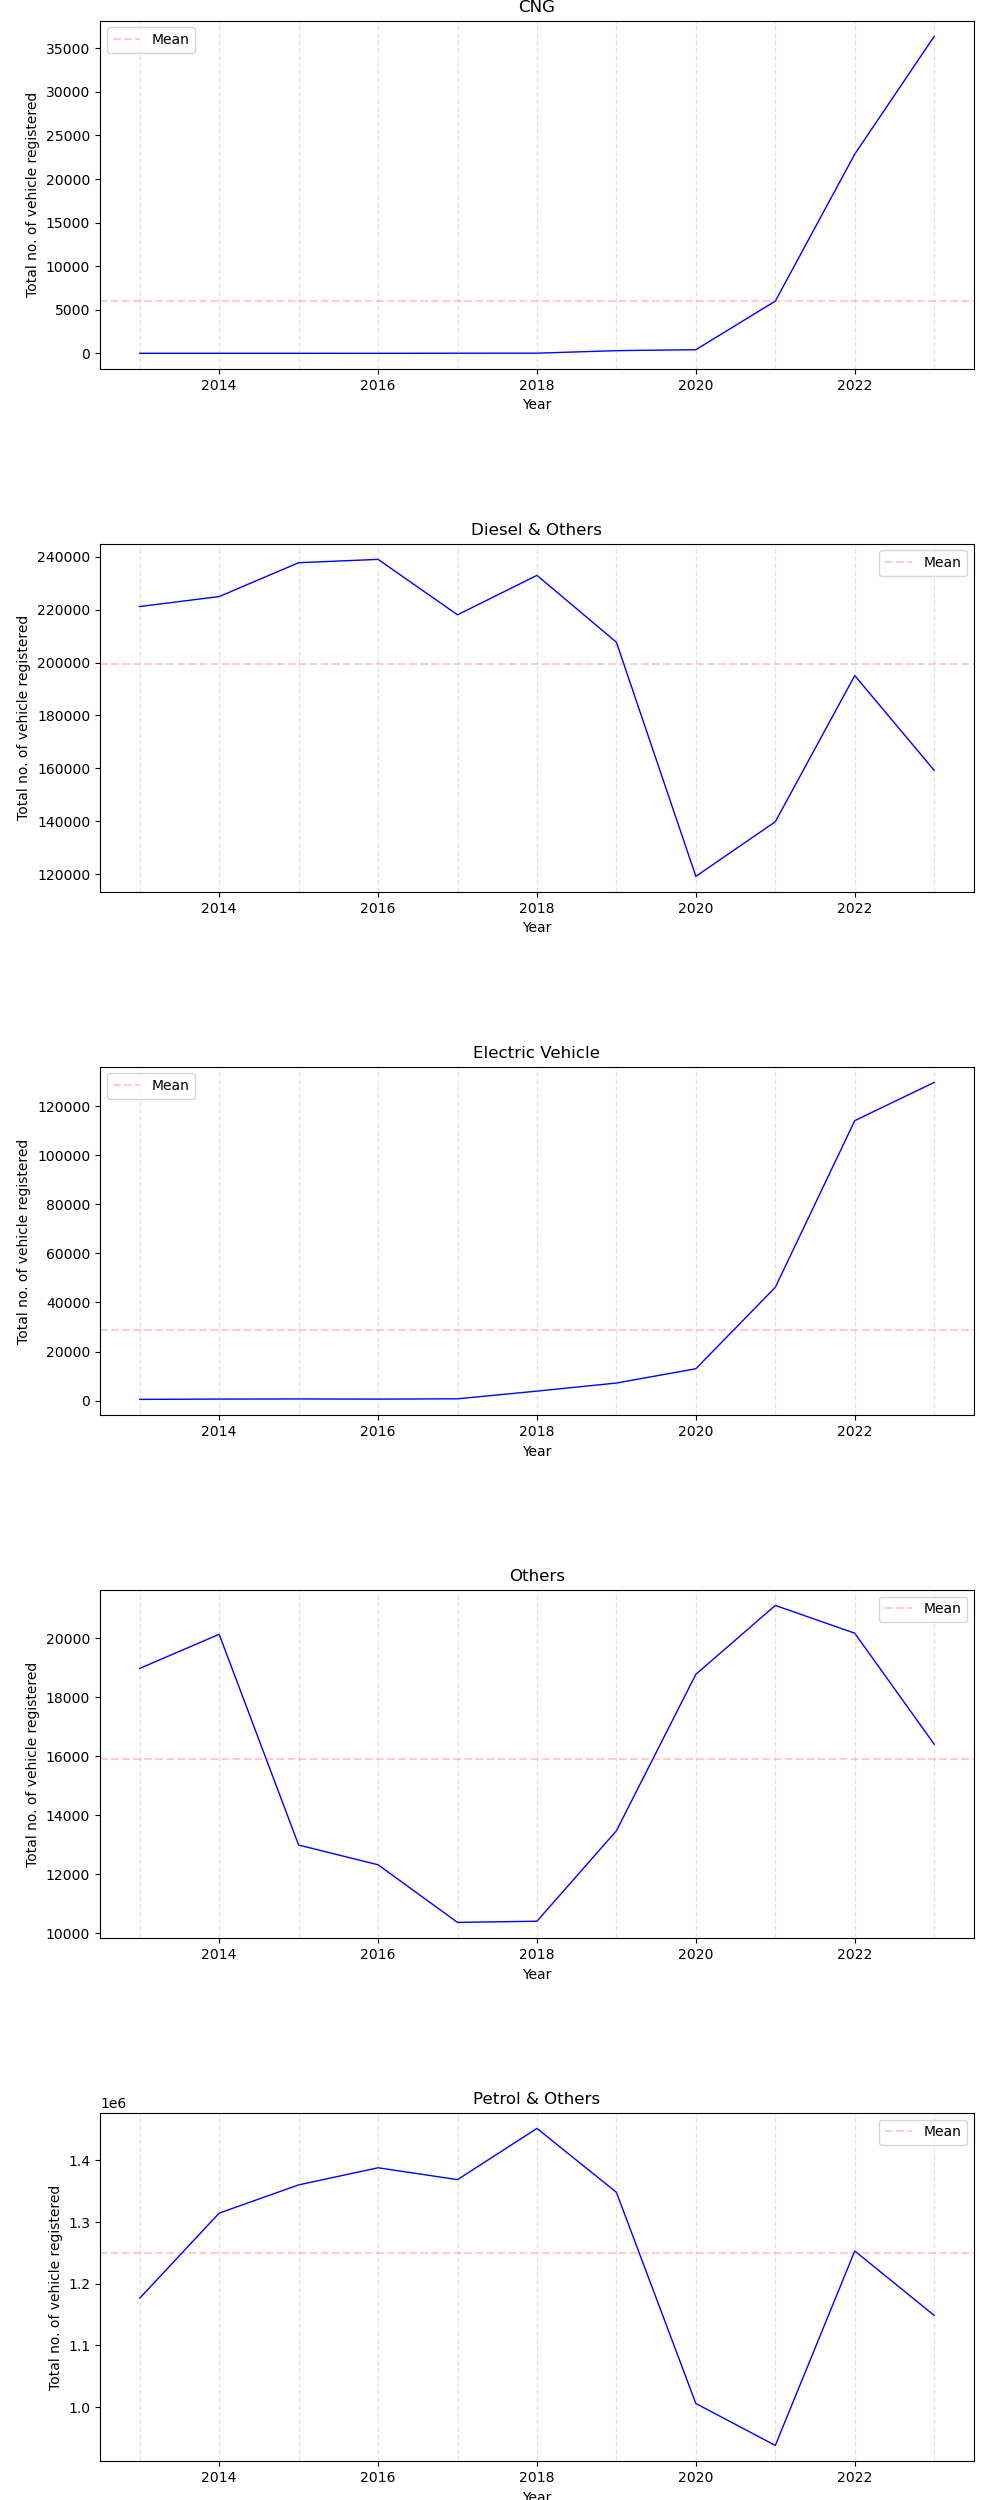

In [22]:
plot_ts(_df_f, fuelCat)

As we know that in future more cleaner fuels will dominate over conventional fuels like petrol and diesel. From the graphs above we can see that CNG and EV are increasing in demand whereas Petrol and Diesel are losing their popularity.
And the decline in 2020 can be credited to COVID.
We can also observe that people started buying cleaner fuel vehicles from 2020 onwards, due to more availablity in clean fuel options

# Model training
To predict future trend of EV I am training ARIMA model on a new dataset containing month-wise registration of EV since 2013.

In [23]:
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
from statsmodels.tsa.stattools import adfuller
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA
from time import time

For this part I will be using a new dataset containing number of registrations of pure ev in last 12 years in India with month-wise frequency, to analyse seasonality, and trends.

In [24]:
df_ev = pd.read_csv("electric_bov.csv")

In [25]:
df_ev

,date,registrations
0,2013-01-01,249
1,2013-02-01,236
2,2013-03-01,218
3,2013-04-01,210
4,2013-05-01,226
...,...,...
139,2024-08-01,107136
140,2024-09-01,97456
141,2024-10-01,110509
142,2024-11-01,96293


*Important*: the date is of format YYYY-MM-DD. One thing to note that the registration is the total number of registrations in that particular month, however the day part in date is 01, this is done to simplify the process. It does not mean that the registration data was updated on first day of the month.

In [26]:
df_ev.date = pd.to_datetime(df_ev.date)

In [27]:
df_ev.set_index('date', inplace=True)

In [28]:
df_ev = df_ev.asfreq(pd.infer_freq(df_ev.index))

In [29]:
df_ev

,registrations
date,
2013-01-01,249
2013-02-01,236
2013-03-01,218
2013-04-01,210
2013-05-01,226
...,...
2024-08-01,107136
2024-09-01,97456
2024-10-01,110509


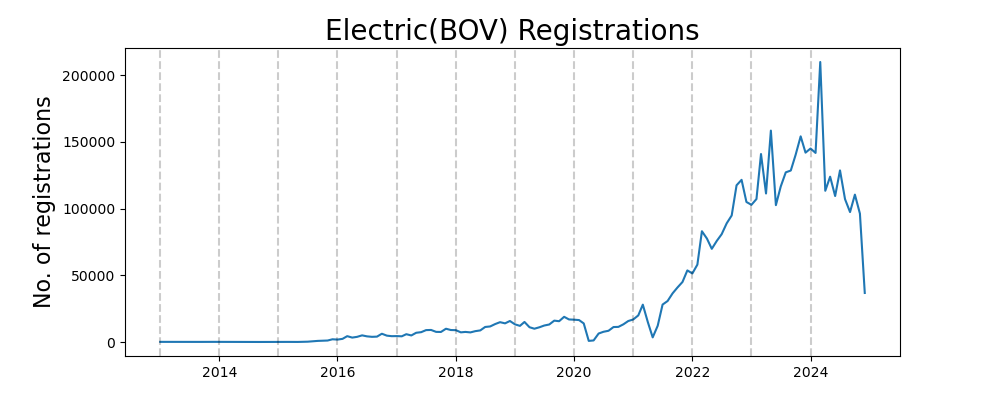

In [30]:
plt.figure(figsize=(10,4))
plt.plot(df_ev)
plt.title('Electric(BOV) Registrations', fontsize=20)
plt.ylabel('No. of registrations', fontsize=16)
for year in range(2013,2025):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), linestyle='--', color='k', alpha=0.2)

The variation in number of registrations started from 2016 onwards. And the current year is 2024 so we dont have actual data of remaining months so, its better to remove data before 2016 and 2024 data.

In [31]:
start_date = datetime(2016,1,1)
end_date = datetime(2023,12,1)
ev = df_ev[start_date:end_date]
ev

,registrations
date,
2016-01-01,1946
2016-02-01,2498
2016-03-01,4519
2016-04-01,3450
2016-05-01,4002
...,...
2023-08-01,127212
2023-09-01,128556
2023-10-01,140385


__To make the model stationary we have to do certain operations on it.__

# Normalization


In [32]:
mu = np.mean(ev)
sigma = np.std(ev.registrations)
norm_ev = (ev-mu)/sigma

In [33]:
mu, sigma

(35916.677083333336, 44109.76867394162)

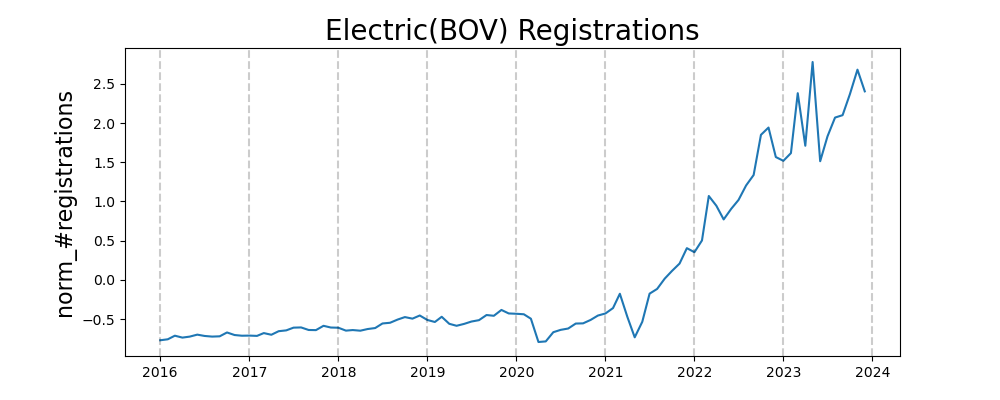

In [101]:
plt.figure(figsize=(10,4))
plt.plot(norm_ev)
# plt.plot(ev)
plt.title('Electric(BOV) Registrations', fontsize=20)
plt.ylabel('norm_#registrations', fontsize=16)
for year in range(2016,2025):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), linestyle='--', color='k', alpha=0.2)

# Logarithm

In [35]:
log_ev= np.log(norm_ev+1)
# log_ev= np.log(ev)

In [36]:
log_ev

,registrations
date,
2016-01-01,-1.470283
2016-02-01,-1.417270
2016-03-01,-1.244128
2016-04-01,-1.331968
2016-05-01,-1.285648
...,...
2023-08-01,1.121590
2023-09-01,1.131467
2023-10-01,1.214429


C:\Users\aadit\AppData\Local\Temp\ipykernel_6848\550890922.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,4))


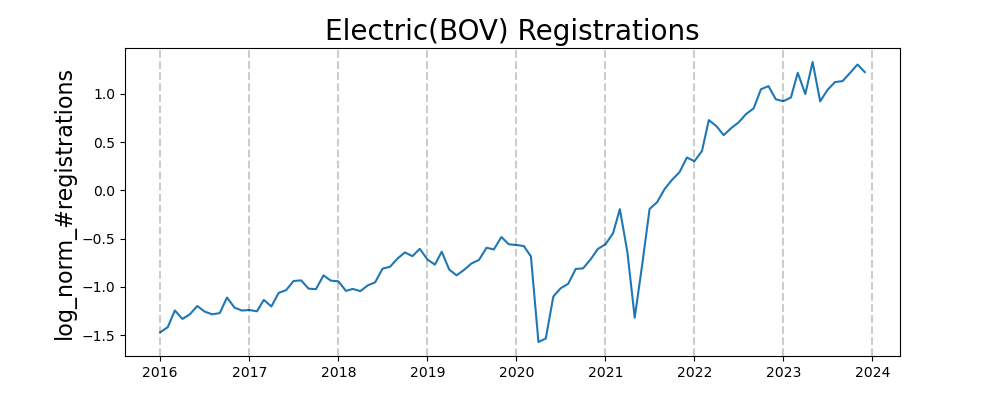

In [102]:
plt.figure(figsize=(10,4))
plt.plot(log_ev)
plt.title('Electric(BOV) Registrations', fontsize=20)
plt.ylabel('log_norm_#registrations', fontsize=16)
for year in range(2016,2025):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), linestyle='--', color='k', alpha=0.2)

In [38]:
log_ev[:datetime(2016,3,1)] 

,registrations
date,
2016-01-01,-1.470283
2016-02-01,-1.417270
2016-03-01,-1.244128


# Differencing

In [39]:
first_diff_ev = log_ev.diff()[1:]

In [40]:
first_diff_ev.describe()

,registrations
count,95.000000
mean,0.028371
std,0.189688
min,-0.887021
25%,-0.033809
50%,0.046309
75%,0.099226
max,0.571824


In [41]:
first_diff_ev

,registrations
date,
2016-02-01,0.053012
2016-03-01,0.173143
2016-04-01,-0.087841
2016-05-01,0.046321
2016-06-01,0.087489
...,...
2023-08-01,0.081430
2023-09-01,0.009877
2023-10-01,0.082963


# Anomaly Detection and Removal

__Seasonal-Trend Decomposition using LOESS (STL)__

In [42]:
from statsmodels.tsa.seasonal import STL

In [43]:
stl = STL(first_diff_ev.registrations)
result = stl.fit()

In [44]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

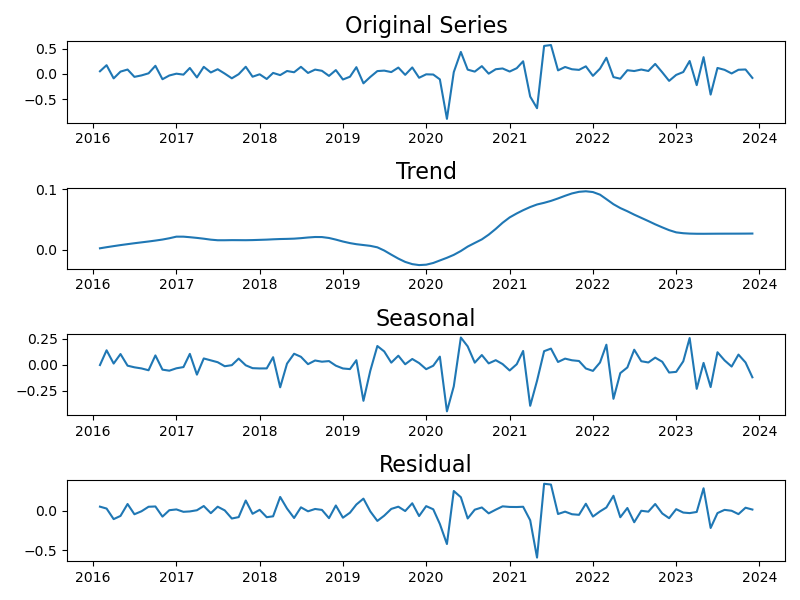

In [45]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(first_diff_ev)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

Text(0.5, 1.0, 'Trend+Seasonal Component')

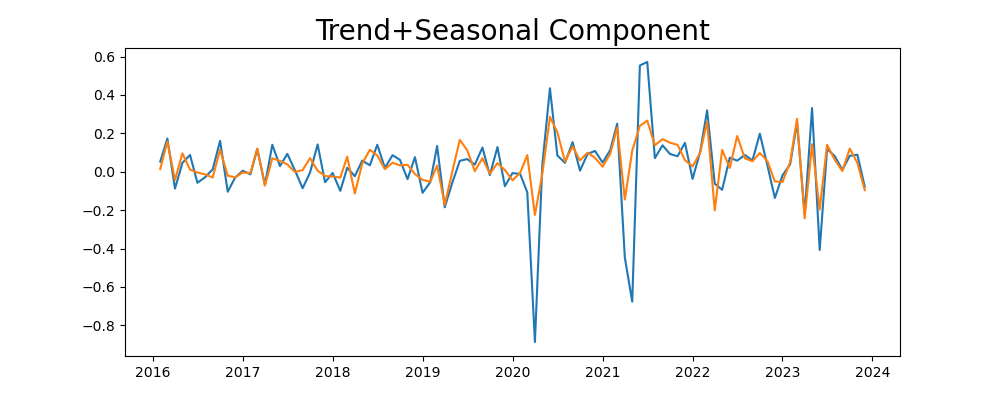

In [104]:
estimated = trend + seasonal
plt.figure(figsize=(10,4))
plt.plot(first_diff_ev)
plt.plot(estimated)
plt.title("Trend+Seasonal Component", fontsize=20)

In [47]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

(16801.0, 19723.0)

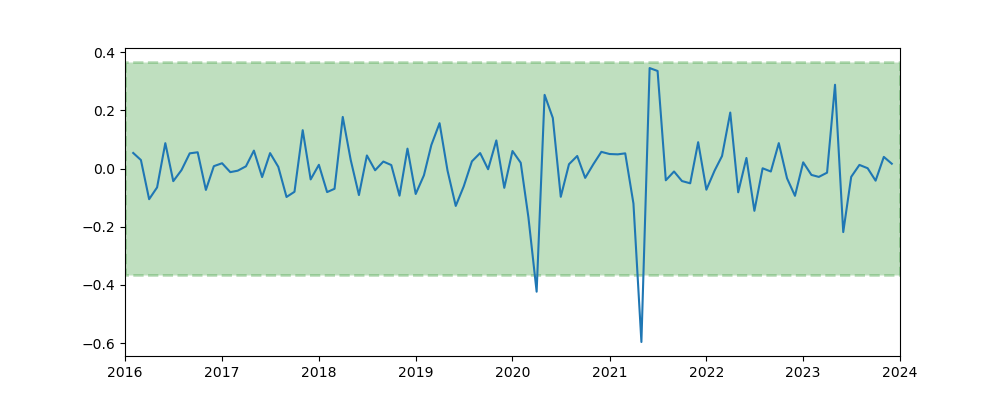

In [48]:
plt.figure(figsize=(10,4))
plt.plot(resid)

plt.fill_between([datetime(2016,1,1), datetime(2024,1,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2016,1,1), datetime(2024,1,1))

In [49]:
anomalies = first_diff_ev[(resid < lower) | (resid > upper)]

Text(0.5, 1.0, 'Anomaly 1')

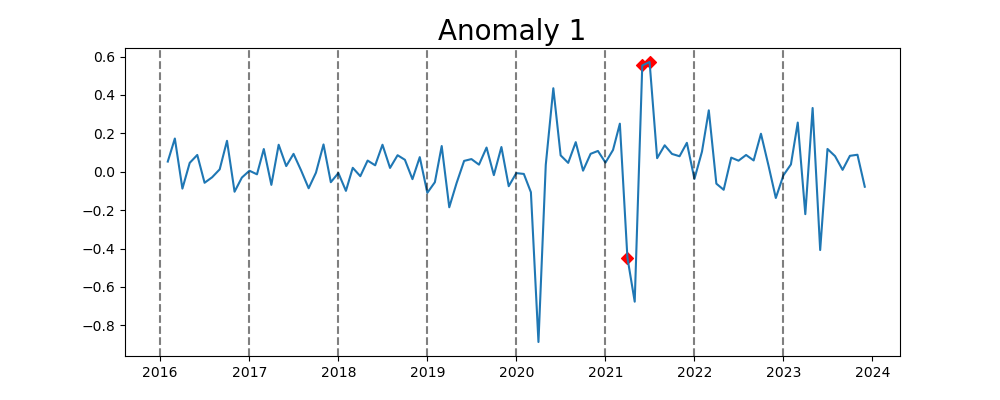

In [105]:
plt.figure(figsize=(10,4))
plt.plot(first_diff_ev)
for year in range(2016,2024):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(anomalies.index, anomalies.registrations, color='r', marker='D')
plt.title('Anomaly 1', fontsize=20)

In [51]:
anomalies

,registrations
date,
2020-04-01,-0.887021
2021-05-01,-0.676951


In [52]:
train_end = datetime(2022,12,1)
test_end = datetime(2023,12,1)

train_data = first_diff_ev[:train_end]
test_data = first_diff_ev[train_end + timedelta(days=1): test_end]

In [53]:
april_data = train_data[train_data.index.month==4]
may_data = train_data[train_data.index.month==5]

In [54]:
april_data

,registrations
date,
2016-04-01,-0.087841
2017-04-01,-0.068423
2018-04-01,-0.023112
2019-04-01,-0.185108
2020-04-01,-0.887021
2021-04-01,-0.446959
2022-04-01,-0.062019


In [55]:
adjusted_data = first_diff_ev.copy()
for curr_anomaly in anomalies.index:
    if curr_anomaly.month == 4:
        adjusted_data.loc[curr_anomaly] = april_data[(april_data.index != curr_anomaly) & (april_data.index < test_data.index[0])].mean()
    else:
        adjusted_data.loc[curr_anomaly] = may_data[(may_data.index != curr_anomaly) & (may_data.index < test_data.index[0])].mean()

In [56]:
print(adjusted_data.loc[datetime(2020,4,1)])
print(adjusted_data.loc[datetime(2021,5,1)])

registrations   -0.145577
Name: 2020-04-01 00:00:00, dtype: float64
registrations    0.02134
Name: 2021-05-01 00:00:00, dtype: float64


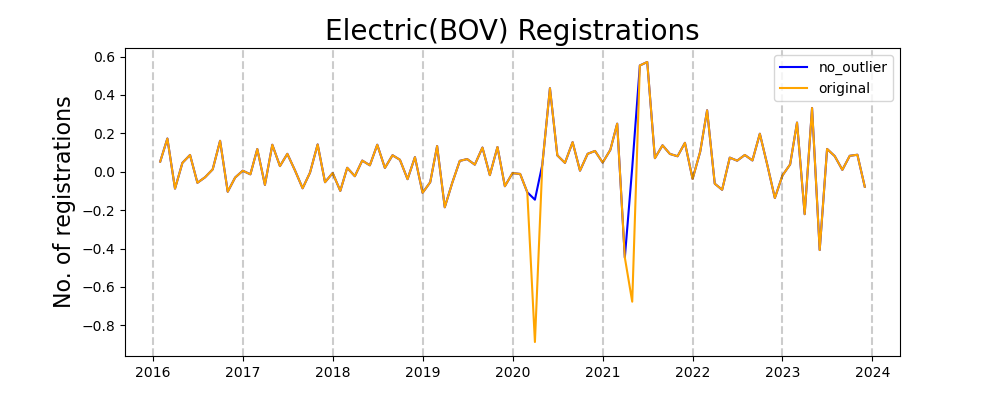

In [57]:
plt.figure(figsize=(10,4))
plt.plot(adjusted_data, color = 'b', label='no_outlier')
plt.plot(first_diff_ev, color ='orange', label='original')
plt.title('Electric(BOV) Registrations', fontsize=20)
plt.legend()
plt.ylabel('No. of registrations', fontsize=16)
for year in range(2016,2025):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), linestyle='--', color='k', alpha=0.2)

Still we can see some of the areas where standard deviation is too high. So, we will again apply anomaly detection technique.

In [58]:
stl2 = STL(adjusted_data.registrations)
result2 = stl2.fit()
seasonal, trend, resid = result2.seasonal, result2.trend, result2.resid
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

(16801.0, 19723.0)

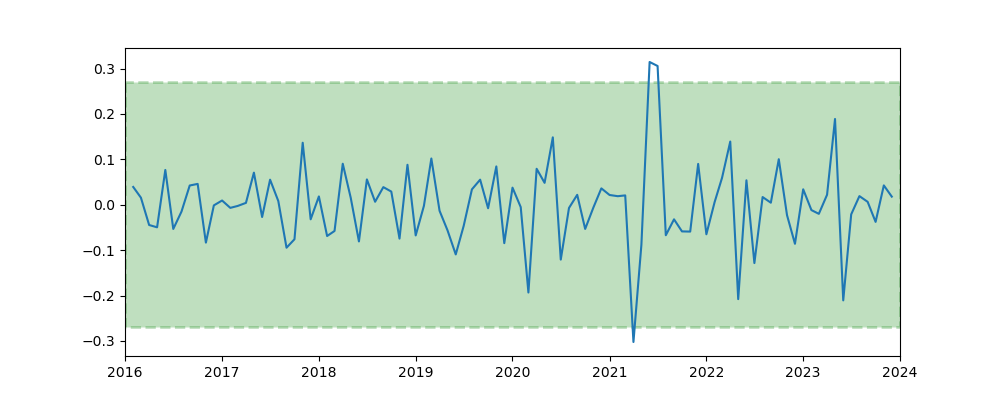

In [59]:
plt.figure(figsize=(10,4))
plt.plot(resid)

plt.fill_between([datetime(2016,1,1), datetime(2024,1,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2016,1,1), datetime(2024,1,1))

In [60]:
anomalies = adjusted_data[(resid < lower) | (resid > upper)]

Text(0.5, 1.0, 'Anomaly 2')

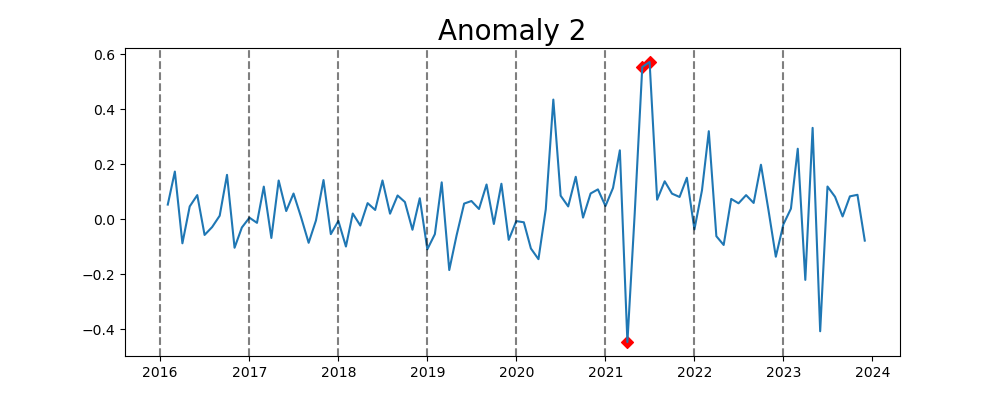

In [106]:
plt.figure(figsize=(10,4))
plt.plot(adjusted_data)
for year in range(2016,2024):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(anomalies.index, anomalies.registrations, color='r', marker='D')
plt.title('Anomaly 2', fontsize=20)

In [62]:
anomalies

,registrations
date,
2021-04-01,-0.446959
2021-06-01,0.553710
2021-07-01,0.571824


In [63]:
train_data = adjusted_data[:train_end]
test_data = adjusted_data[train_end + timedelta(days=1): test_end]

In [64]:
april_data = train_data[train_data.index.month==4]
june_data = train_data[train_data.index.month==6]
july_data = train_data[train_data.index.month==7]

In [65]:
adjusted_data2 = adjusted_data.copy()
for curr_anomaly in anomalies.index:
    if curr_anomaly.month == 4:
        adjusted_data2.loc[curr_anomaly] = april_data[(april_data.index != curr_anomaly) & (april_data.index < test_data.index[0])].mean()
    elif curr_anomaly.month == 6:
        adjusted_data2.loc[curr_anomaly] = june_data[(june_data.index != curr_anomaly) & (june_data.index < test_data.index[0])].mean()
    elif curr_anomaly.month == 7:
        adjusted_data2.loc[curr_anomaly] = july_data[(july_data.index != curr_anomaly) & (july_data.index < test_data.index[0])].mean()

In [66]:
print(adjusted_data2.loc[datetime(2020,4,1)])
print(adjusted_data2.loc[datetime(2021,5,1)])

registrations   -0.145577
Name: 2020-04-01 00:00:00, dtype: float64
registrations    0.02134
Name: 2021-05-01 00:00:00, dtype: float64


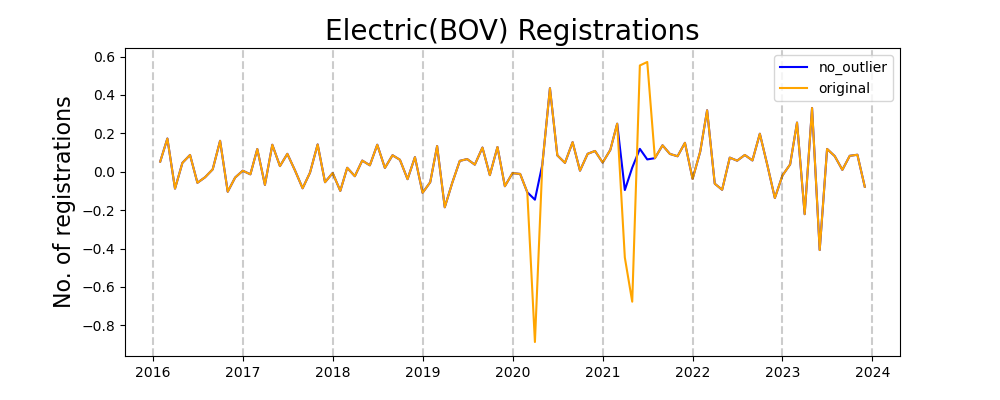

In [67]:
plt.figure(figsize=(10,4))
plt.plot(adjusted_data2, color = 'b', label='no_outlier')
plt.plot(first_diff_ev, color ='orange', label='original')
plt.title('Electric(BOV) Registrations', fontsize=20)
plt.legend()
plt.ylabel('No. of registrations', fontsize=16)
for year in range(2016,2025):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), linestyle='--', color='k', alpha=0.2)

__Lets check for stationarity__

In [68]:
def adfuller_test(dframe):
    result = adfuller(dframe)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

In [69]:
adfuller_test(adjusted_data2)

ADF Test Statistic : -12.105658766396338
p-value : 1.9717561918338796e-22
#Lags Used : 0
Number of Observations Used : 94


The first difference is stationary. Now we will train the model.

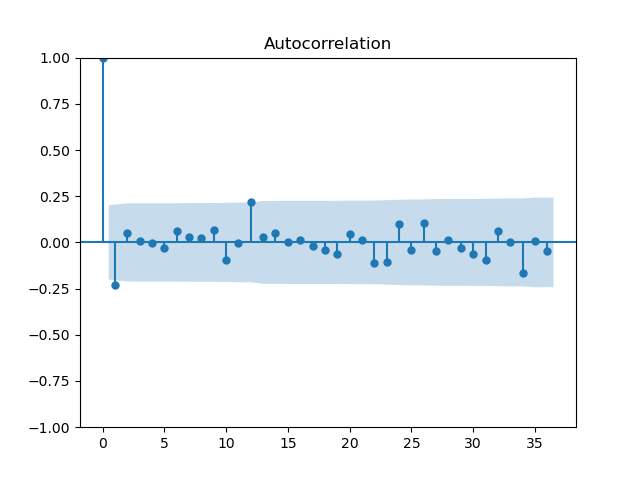

In [70]:
acf_plot = plot_acf(adjusted_data2, lags=36)

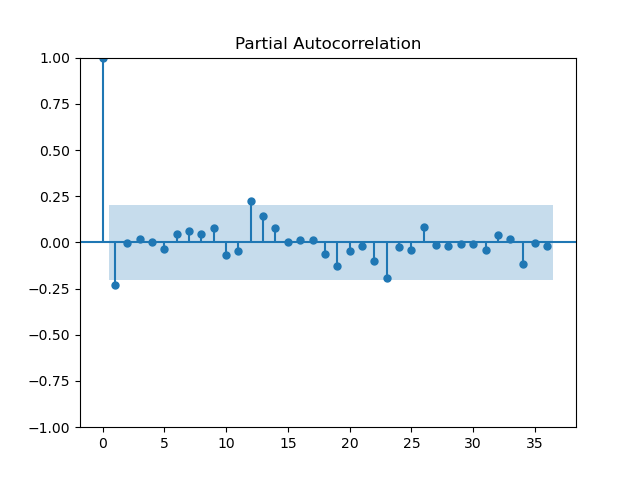

In [71]:
pacf_plot = plot_pacf(adjusted_data2, lags=36)

We see that the p=1, q=1 and there is also seasonality (see 12th lag of both acf and pacf). Since we can see some seasonality also, we will train SARIMA model rather than simple ARIMA model.

In [72]:
train_data = adjusted_data2[:train_end]

We can see that there is seasonality so we will use SARIMA model.

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [74]:
train_data = adjusted_data2[:train_end]

__Lets train SARIMA model__

In [449]:
my_order = (1,0,1) # (0, 0, 12),(0,0,1),(1,0,1),(0,0,0)
my_seasonal_order= (1,0,0,12) # (1,0,0,12), (1,0,0,12),(1,0,0,12),(1,0,0,12)
model = SARIMAX(train_data, order= my_order, seasonal_order=my_seasonal_order)

In [450]:
start = time()
model_fit = model.fit()
end = time()
print('model training time: ', end-start)

model training time:  0.17020654678344727


C:\Users\aadit\anaconda3\envs\AV_ML_prac\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [451]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                       registrations   No. Observations:                   83
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                  73.292
Date:                             Wed, 25 Dec 2024   AIC                           -138.584
Time:                                     19:34:30   BIC                           -128.908
Sample:                                 02-01-2016   HQIC                          -134.697
                                      - 12-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9921      0.055     18.164      0.000       0.885       1.099
ma.L1         -0.9663      0.104     -9.299      0.000      -1.170      -0.763
ar.S.L12       0.3165      0.119      2.660      0.008       0.083       0.550
sigma2         0.0097      0.001      8.538      0.000       0.007       0.012
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                28.04
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                             0.76
Prob(H) (two-sided):                  0.24   Kurtosis:                         5.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We can see the P values are below threshold of 0.05, hence the model is perfect and will perform good.

__Lets predict the 1 year ahead of data__

In [452]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [453]:
predictions = model_fit.predict(start= pred_start_date, end= pred_end_date)

In [454]:
predictions = pd.DataFrame(predictions)

In [455]:
predictions.head(3)

,predicted_mean
2023-01-01,0.014406
2023-02-01,0.059243
2023-03-01,0.127106


In [456]:
predictions.index = predictions.index.rename('date')

In [457]:
residuals = test_data.registrations - predictions.predicted_mean

In [458]:
residuals

date
2023-01-01   -0.033320
2023-02-01   -0.020993
2023-03-01    0.129136
2023-04-01   -0.226919
2023-05-01    0.336529
2023-06-01   -0.456373
2023-07-01    0.075524
2023-08-01    0.028972
2023-09-01   -0.033377
2023-10-01   -0.004136
2023-11-01    0.054287
2023-12-01   -0.058834
Freq: MS, dtype: float64

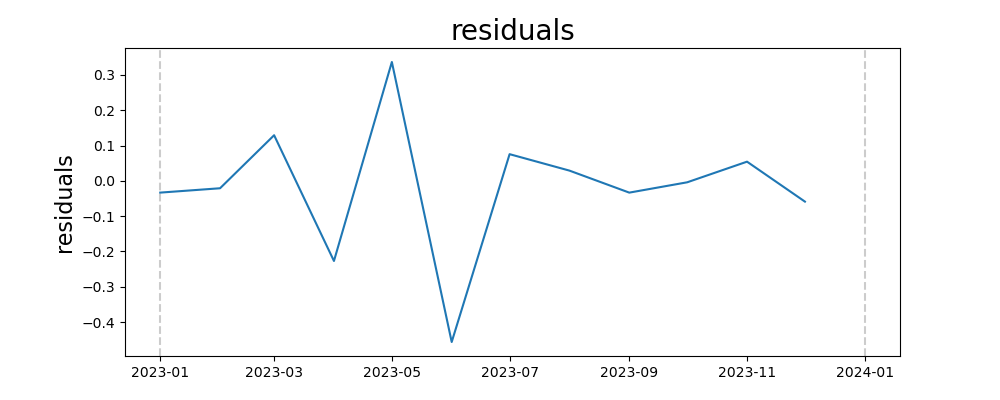

In [459]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('residuals', fontsize=20)
plt.ylabel('residuals', fontsize=16)
for year in range(2023,2025):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), linestyle='--', color='k', alpha=0.2)

From residual we can say that the model is not too good, and that's understandable. Because of 2023 data is highly volatile. That can be the effect of some news against EVs, such as damaged batteries, long charging time, very high cost, etc.

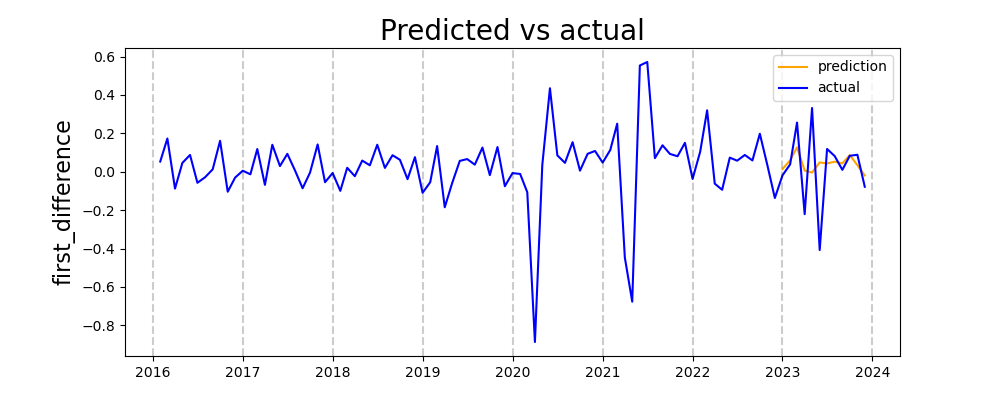

In [475]:
plt.figure(figsize=(10,4))
plt.plot(predictions, color = 'orange', label='prediction')
plt.plot(first_diff_ev, color ='b', label='actual')
plt.legend()
plt.title('Predicted vs actual', fontsize=20)
plt.ylabel('first_difference', fontsize=16)
for year in range(2016,2025):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), linestyle='--', color='k', alpha=0.2)

In [461]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 0.18378665629912658


In [462]:
print('Mean Absolute Percentage Error:', round(np.mean(abs(residuals/test_data.registrations)),4))

Mean Absolute Percentage Error: 0.98


# Undo Transformations

Having the predicted data, now we can undo all the transformations we did, normalization, logarithm and differencing.

In [463]:
def undo_transformations(predictions, series, mu, sigma):
    first_pred = sigma*(np.exp(predictions.predicted_mean[0] + np.log(((series.iloc[-1]-mu)/sigma)+1))-1) + mu
    orig_predictions = [first_pred]
    
    for i in range(len(predictions)-1):
        next_pred = sigma*(np.exp(predictions.predicted_mean[i+1] + np.log(((orig_predictions[-1]-mu)/sigma)+1))-1) + mu
        orig_predictions.append(next_pred)
    
    return np.array(orig_predictions).flatten()

In [464]:
train_end

datetime.datetime(2022, 12, 1, 0, 0)

In [465]:
train = ev[:train_end]
train

,registrations
date,
2016-01-01,1946
2016-02-01,2498
2016-03-01,4519
2016-04-01,3450
2016-05-01,4002
...,...
2022-08-01,89012
2022-09-01,94914
2022-10-01,117500


In [466]:
orig_pred= undo_transformations(predictions, train, mu, sigma)

In [467]:
orig_pred

array([106648.52698561, 113657.61105071, 130172.99998954, 131000.51013379,
       130397.441     , 137282.87651362, 143712.34510144, 151893.6080561 ,
       158969.97440437, 174182.52933804, 180556.20958015, 176954.54773332])

Text(0, 0.5, 'No. of Registrations')

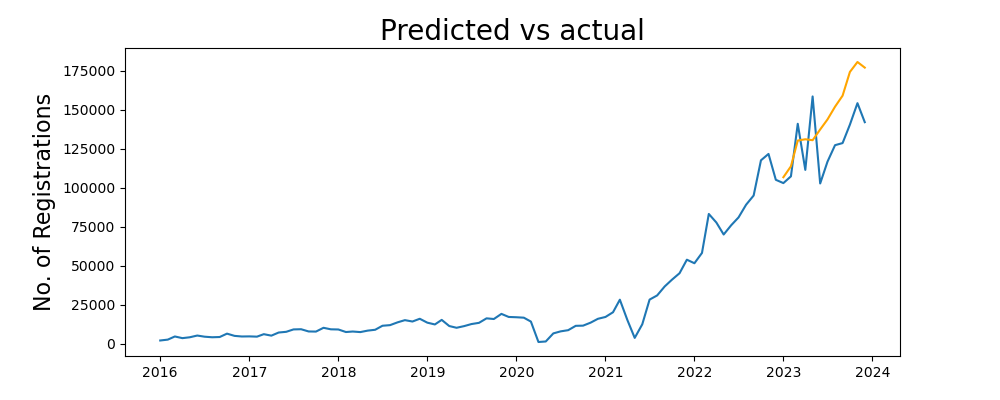

In [476]:
plt.figure(figsize=(10,4))
plt.plot(ev, label="actual")
plt.plot(test_data.index, orig_pred, color='orange', label="prediction")
plt.title('Predicted vs actual', fontsize=20)
plt.ylabel('No. of Registrations', fontsize=16)

In [469]:
train_end = datetime(2022,12,1)
test_end = datetime(2023,12,1)

In [470]:
orig_test_data = ev[train_end + timedelta(days=1): test_end]

In [471]:
orig_test_data

,registrations
date,
2023-01-01,102885
2023-02-01,107216
2023-03-01,140923
2023-04-01,111361
2023-05-01,158467
2023-06-01,102645
2023-07-01,116623
2023-08-01,127212
2023-09-01,128556


In [472]:
orig_residuals = orig_test_data.registrations - orig_pred

In [473]:
orig_residuals

date
2023-01-01    -3763.526986
2023-02-01    -6441.611051
2023-03-01    10750.000010
2023-04-01   -19639.510134
2023-05-01    28069.559000
2023-06-01   -34637.876514
2023-07-01   -27089.345101
2023-08-01   -24681.608056
2023-09-01   -30413.974404
2023-10-01   -33797.529338
2023-11-01   -26400.209580
2023-12-01   -34995.547733
Freq: MS, Name: registrations, dtype: float64

In [474]:
print('Mean Absolute Percentage Error:', round(np.mean(abs(orig_residuals/orig_test_data.registrations)),4))

Mean Absolute Percentage Error: 0.1821


__We can try many different values of parameters in SARIMA and many will give better results, less than 10% error, but when predicting the future we should go with the model that can be explained theoritically and based on previous data. This model is doing just that. Unexpected high volatility of test data is the reason for 18% error.__